# Question 2

### 1. The activation function at output should be an Identity/Linear function because it is a linear regression task. For the output to be unbounded this activation function is ideal.
### 2. The neurons in the output layer should be 1 since we are predicting only one output value

In [111]:
#import numpy, pandas
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.random import RandomState

In [112]:
#load data
X_train = np.loadtxt("X_train.csv")
Y_train = np.loadtxt("Y_train.csv")
X_test = np.loadtxt("X_test.csv")
Y_test = np.loadtxt("Y_test.csv")

Y_train = Y_train.reshape(Y_train.shape[0],1)
Y_test = Y_test.reshape(Y_test.shape[0],1)

In [113]:
X_train

array([[-2.51896952e-01, -5.78120259e-01],
       [-3.91088967e-01,  1.74347695e+00],
       [ 3.86030312e-01,  2.08401853e+00],
       [ 7.54121433e-01, -7.72040644e-01],
       [-1.70608593e+00, -1.15911942e+00],
       [ 1.00405615e+00,  1.03191586e+00],
       [-3.91156627e-01,  1.02829316e+00],
       [ 1.47026771e-01, -4.79448039e-01],
       [-4.68756286e-01,  8.60097036e-01],
       [-8.02843171e-01, -2.53479383e-01],
       [-1.25380801e-01, -9.45588125e-01],
       [-1.08047146e+00,  9.02397757e-01],
       [-5.32470526e-01,  2.11772738e+00],
       [-2.05256292e+00, -1.66646116e-01],
       [ 2.70684984e+00,  6.28132709e-01],
       [ 6.41805511e-01, -9.05099902e-01],
       [-5.47259888e-01,  4.96726954e-01],
       [ 1.87124522e-01, -7.32845148e-01],
       [ 7.20787599e-01, -1.22308204e+00],
       [ 1.13370299e+00,  5.28186734e-01],
       [-8.54859901e-01,  1.60281554e+00],
       [-4.45872783e-01,  6.85873765e-01],
       [-1.13664459e+00,  3.66479606e-04],
       [-9.

### NN Elements:-

#### Linear Layer:

In [114]:
class Linear_Layer():
  def __init__(self,in_size,out_size):
    np.random.seed(0)
    self.W = np.random.randn(in_size,out_size) * 0.01
    self.b = np.zeros((1,out_size))
    self.params = [self.W,self.b]
    # print(self.params)
    self.g_W = None
    self.g_b = None
    self.Inputg = None

  def forward_pass(self,X):
    self.X = X # X = [ X1 , X2, X3 .....]
    # print(self.W.shape)
    self.output = np.dot(X,self.W) + self.b
    return self.output
  
  def backward_pass(self,next_g):
    self.g_W = np.dot(self.X.T,next_g)
    self.g_b = np.sum(next_g,axis = 0)
    self.Inputg = np.dot(next_g,self.W.T)
    return self.Inputg, [self.g_W,self.g_b]

#### Activation Functions

In [115]:
class Sigmoid_Activation():
  def __init__(self):
    self.params = []
    self.Inputg = None
  
  def forward_pass(self,X):
    self.input = X.copy()
    self.output = 1/(1 + np.exp(-X))
    return self.output

  def backward_pass(self,next_g):
    g_x = 1/(1 + np.exp(-self.input))
    self.g = g_x*(1-g_x)
    self.Inputg = next_g * self.g
    return self.Inputg, []

In [116]:
class ReLU_Activation():
    def __init__(self):
        self.params = []
        self.gInput = None

    def forward_pass(self, X):
        self.output = np.maximum(X, 0)
        return self.output

    def backward_pass(self, nextg):
        self.gInput = nextg.copy()
        self.gInput[self.output <=0] = 0
        return self.gInput, []

In [117]:
class TanH_Activation():
    def __init__(self):
      self.params = []
      self.gInput = None

    def forward_pass(self,X):
      self.input = X.copy()
      self.output = (np.exp(X) - np.exp(-X))/(np.exp(X) + np.exp(-X))
      return self.output

    def backward_pass(self,next_g):
      self.g = 1 - (self.output)**2
      self.Inputg = next_g * self.g
      return self.Inputg, []

## Loss Function

In [118]:
class MSE:
  def forward_pass(self,X,Y):
    self.Loss = (1/2)*np.dot((X-Y),np.transpose(X-Y))
    return self.Loss
  
  def backward_pass(self,X,Y):
    next_g = X-Y
    return next_g

## Gradient Update Method

In [119]:
# Momentum
def update_params(velocity, params, gs, learning_rate=0.01, mu=0.9):
    for v, p, g, in zip(velocity, params, reversed(gs)):
        for i in range(len(g)):
            v[i] = mu * v[i] + 0.01*learning_rate * g[i]
            p[i] -= v[i]
        

# NN

In [120]:
class NN_Model():
  def __init__(self,loss_func = MSE()):
    self.layers = []
    self.params = []
    self.gs = []
    self.loss_func = loss_func

  def add_layer(self,layer):
    self.layers.append(layer)
    self.params.append(layer.params)

  def forward(self,X):
    input = X.copy()
    for layer in self.layers:
      input_for_next_layer = layer.forward_pass(input)
      input = input_for_next_layer
    output = input
    return (output)
  
  def backward(self,next_g):
    self.clear_gs()
    for layer in reversed(self.layers):
      next_g,gs = layer.backward_pass(next_g)
      self.gs.append(gs)
    return (self.gs)

  def train_step(self, X, y):
    out = self.forward(X)
    # print(out)
    loss = self.loss_func.forward_pass(out,y)
    nextg = self.loss_func.backward_pass(out,y)
    gs = self.backward(nextg)
    return loss, gs
    
  def predict(self, X):
      X = self.forward(X)
      return X
      
  def clear_gs(self):
      self.gs = []
  
  def check_accuracy(self,Y,y_predicted):
    R = 1 - (np.dot((y_predicted-Y).T,(y_predicted-Y))/np.dot((Y-np.mean(Y)).T,(Y-np.mean(Y))))
    return (R)

## Training

In [121]:
def train(net, X_train, y_train, epoch, learning_rate, mu=0.3,output = True, X_val=None, y_val=None):
    train_loss_epoch = []
    train_acc = []
    val_loss_epoch = []
    val_acc = []

    for i in range(epoch):
        loss_batch = []
        val_loss_batch = []
        velocity = []
        for param_layer in net.params:
            p = [np.zeros_like(param) for param in list(param_layer)]
            velocity.append(p)
        # Batch Training
        loss, gs = net.train_step(X_train, y_train)
        loss_batch.append(loss)
        update_params(velocity, net.params, gs, learning_rate=learning_rate, mu=mu)

        val_loss, _ = net.train_step(X_val, y_val)
        val_loss_batch.append(val_loss)

        mean_train_loss = sum(loss_batch) / float(len(loss_batch))
        mean_val_loss = sum(val_loss_batch) / float(len(val_loss_batch))
        
        y_train_pred = net.predict(X_train)
        y_val_pred = net.predict(X_val)

        train_ac = net.check_accuracy(y_train, y_train_pred)
        val_ac = net.check_accuracy(y_val, y_val_pred)
        # print(train_ac)

        train_acc.append(train_ac[0][0])
        val_acc.append(val_ac[0][0])

        val_loss_epoch.append(mean_val_loss[0][0])
        train_loss_epoch.append(mean_train_loss[0][0])

        if ((i+1)%10 == 0) and (output == True):
          print("{0}th Iteration: Training loss Loss = {1} | Testing Loss = {2}".format(i+1,np.round(mean_train_loss[0][0],3), np.round(mean_val_loss[0][0],3)))
    return (train_acc,train_loss_epoch,val_acc,val_loss_epoch)

## NN - Sigmoid Activation

In [122]:
## hyperparameters
hidden_nodes = 5
output_nodes = 1

## define neural net
nn_sig = NN_Model()
nn_sig.add_layer(Linear_Layer(X_test.shape[1], hidden_nodes))
nn_sig.add_layer(Sigmoid_Activation())
nn_sig.add_layer(Linear_Layer(hidden_nodes, output_nodes))

In [123]:
learning_rate = 0.05
iterations = 200
train_acc,train_loss_epoch,val_acc,val_loss_epoch = train(nn_sig,X_train , Y_train,epoch= iterations, learning_rate=learning_rate, X_val=X_test, y_val=Y_test)

10th Iteration: Training loss Loss = 921.692 | Testing Loss = 92.714
20th Iteration: Training loss Loss = 605.643 | Testing Loss = 6.68
30th Iteration: Training loss Loss = 372.751 | Testing Loss = 22.715
40th Iteration: Training loss Loss = 219.08 | Testing Loss = 21.819
50th Iteration: Training loss Loss = 128.028 | Testing Loss = 16.645
60th Iteration: Training loss Loss = 68.055 | Testing Loss = 5.851
70th Iteration: Training loss Loss = 24.072 | Testing Loss = 0.053
80th Iteration: Training loss Loss = 1.856 | Testing Loss = 1110.853
90th Iteration: Training loss Loss = 0.042 | Testing Loss = 0.08
100th Iteration: Training loss Loss = 3.181 | Testing Loss = 0.8
110th Iteration: Training loss Loss = 8.438 | Testing Loss = 0.886
120th Iteration: Training loss Loss = 12.567 | Testing Loss = 0.656
130th Iteration: Training loss Loss = 13.664 | Testing Loss = 0.366
140th Iteration: Training loss Loss = 11.625 | Testing Loss = 0.223
150th Iteration: Training loss Loss = 8.079 | Testing 

In [124]:
y_train_pred = nn_sig.predict(X_train)
y_test_pred = nn_sig.predict(X_test)

trainacc = nn_sig.check_accuracy(Y_train, y_train_pred)
testacc = nn_sig.check_accuracy(Y_test, y_test_pred)

print("Train Accuracy = {0} & Test Accuracy = {1}".format(round(trainacc[0][0],3),round(testacc[0][0],3)))

Train Accuracy = 0.961 & Test Accuracy = 0.909


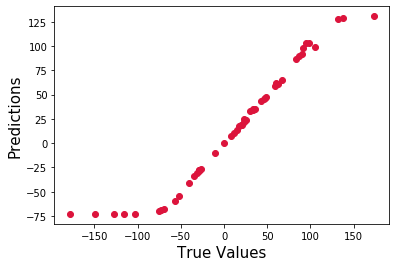

In [125]:
plt.scatter(Y_test, y_test_pred, c='crimson')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.show()

In [126]:
print("Final Training loss Loss = {0} & Testing Loss = {1}".format(round(train_loss_epoch[-1],3), round(val_loss_epoch[-1],3)))

Final Training loss Loss = 0.0 & Testing Loss = 0.153


### loss and accuracy as a function of the number of iterations:

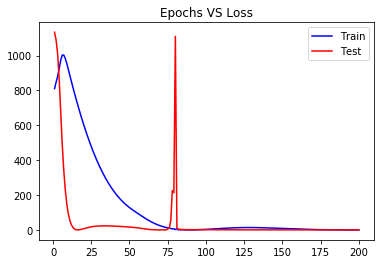

In [127]:
plt.plot(np.arange(0,iterations)+1,train_loss_epoch,'b')
plt.plot(np.arange(0,iterations)+1,val_loss_epoch,'r')
plt.title("Epochs VS Loss")
plt.legend(['Train','Test'])
plt.show()

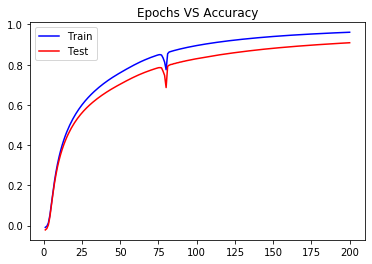

In [128]:
plt.plot(np.arange(0,iterations)+1,train_acc,'b')
plt.plot(np.arange(0,iterations)+1,val_acc,'r')
plt.title("Epochs VS Accuracy")
plt.legend(['Train','Test'])
plt.show()

# Effect of Learning Rate on Losses and Accuracy of model  

## Learning Rate vs Accuracy

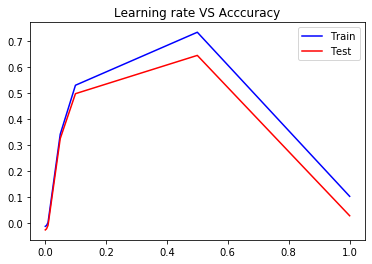

In [129]:
LR = [0.001,0.005,0.01,0.05,0.1,0.5,1]
train_accuracies = []
test_accuracies = []
for lr in LR:
  ## hyperparameters
  hidden_nodes = 5
  output_nodes = 1

  ## define neural net
  nn_sig = NN_Model()
  nn_sig.add_layer(Linear_Layer(X_test.shape[1], hidden_nodes))
  nn_sig.add_layer(Sigmoid_Activation())
  nn_sig.add_layer(Linear_Layer(hidden_nodes, output_nodes))
  learning_rate = lr
  iterations = 10
  train_acc,train_loss_epoch,val_acc,val_loss_epoch = train(nn_sig,X_train , Y_train,epoch= iterations,output = False, learning_rate=learning_rate, X_val=X_test, y_val=Y_test)
  train_accuracies.append(train_acc[-1])
  test_accuracies.append(val_acc[-1])

plt.plot(LR,train_accuracies,'b')
plt.plot(LR,test_accuracies,'r')
plt.title("Learning rate VS Acccuracy")
plt.legend(['Train','Test'])
# plt.ylim((0,3))
plt.show()


## Hidden Nodes vs Accuracy

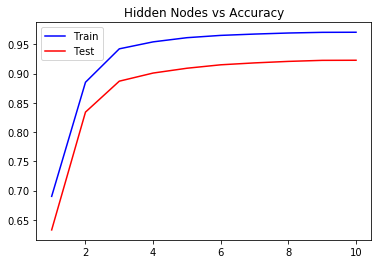

In [130]:
hidden_ = np.arange(1,11,1)
train_accuracies = []
test_accuracies = []
for nodes in hidden_:
  ## hyperparameters
  hidden_nodes = nodes
  output_nodes = 1

  ## define neural net
  nn_sig = NN_Model()
  nn_sig.add_layer(Linear_Layer(X_test.shape[1], hidden_nodes))
  nn_sig.add_layer(Sigmoid_Activation())
  nn_sig.add_layer(Linear_Layer(hidden_nodes, output_nodes))
  learning_rate = 0.05
  iterations = 200
  train_acc,train_loss_epoch,val_acc,val_loss_epoch = train(nn_sig,X_train , Y_train,epoch= iterations,output = False, learning_rate=learning_rate, X_val=X_test, y_val=Y_test)
  train_accuracies.append(train_acc[-1])
  test_accuracies.append(val_acc[-1])


plt.plot(hidden_,train_accuracies,'b')
plt.plot(hidden_,test_accuracies,'r')
plt.title("Hidden Nodes vs Accuracy")
plt.legend(['Train','Test'])
# plt.ylim((0,3))
plt.show()

## Hidden Nodes vs Losses

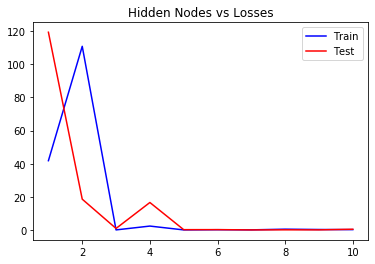

In [131]:
hidden_ = np.arange(1,11,1)
train_losses = []
test_losses = []
for nodes in hidden_:
  ## hyperparameters
  hidden_nodes = nodes
  output_nodes = 1

  ## define neural net
  nn_sig = NN_Model()
  nn_sig.add_layer(Linear_Layer(X_test.shape[1], hidden_nodes))
  nn_sig.add_layer(Sigmoid_Activation())
  nn_sig.add_layer(Linear_Layer(hidden_nodes, output_nodes))
  learning_rate = 0.05
  iterations = 200
  train_acc,train_loss_epoch,val_acc,val_loss_epoch = train(nn_sig,X_train , Y_train,epoch= iterations,output = False, learning_rate=learning_rate, X_val=X_test, y_val=Y_test)
  train_losses.append(train_loss_epoch[-1])
  test_losses.append(val_loss_epoch[-1])

plt.plot(hidden_,train_losses,'b')
plt.plot(hidden_,test_losses,'r')
plt.title("Hidden Nodes vs Losses")
plt.legend(['Train','Test'])
# plt.ylim((0,3))
plt.show()

### As the number of nodes in the hidden layer increase , the accuracy is increasing and the loss is decreasing for both the train and test data. Which means the model is complex but stable. And after 5 loss and accuracy are constant, so its not useful to increase after 5

### NN Model - ReLU activation

In [132]:
## hyperparameters
hidden_nodes = 4
output_nodes = 1

## define neural net
nn_rel = NN_Model()
nn_rel.add_layer(Linear_Layer(X_test.shape[1], hidden_nodes))
nn_rel.add_layer(ReLU_Activation())
nn_rel.add_layer(Linear_Layer(hidden_nodes, output_nodes))

In [133]:
learning_rate = 0.005
iterations = 150
train_acc,train_loss_epoch,val_acc,val_loss_epoch = train(nn_rel,X_train , Y_train,epoch= iterations, learning_rate=learning_rate, X_val=X_test, y_val=Y_test)

10th Iteration: Training loss Loss = 823.475 | Testing Loss = 1156.477
20th Iteration: Training loss Loss = 853.22 | Testing Loss = 582.697
30th Iteration: Training loss Loss = 790.167 | Testing Loss = 26.617
40th Iteration: Training loss Loss = 367.672 | Testing Loss = 4.37
50th Iteration: Training loss Loss = 70.624 | Testing Loss = 20.819
60th Iteration: Training loss Loss = 79.327 | Testing Loss = 37.363
70th Iteration: Training loss Loss = 66.51 | Testing Loss = 33.206
80th Iteration: Training loss Loss = 54.66 | Testing Loss = 27.814
90th Iteration: Training loss Loss = 43.765 | Testing Loss = 22.422
100th Iteration: Training loss Loss = 35.314 | Testing Loss = 17.18
110th Iteration: Training loss Loss = 27.526 | Testing Loss = 11.894
120th Iteration: Training loss Loss = 20.566 | Testing Loss = 7.603
130th Iteration: Training loss Loss = 13.943 | Testing Loss = 4.36
140th Iteration: Training loss Loss = 9.154 | Testing Loss = 2.311
150th Iteration: Training loss Loss = 5.948 | T

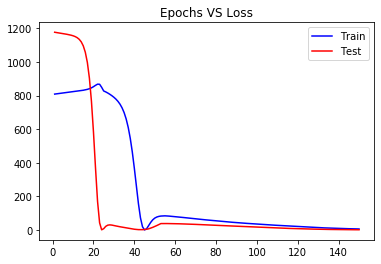

In [134]:
plt.plot(np.arange(0,iterations)+1,train_loss_epoch,'b')
plt.plot(np.arange(0,iterations)+1,val_loss_epoch,'r')
plt.title("Epochs VS Loss")
plt.legend(['Train','Test'])
# plt.ylim((0,3))
plt.show()

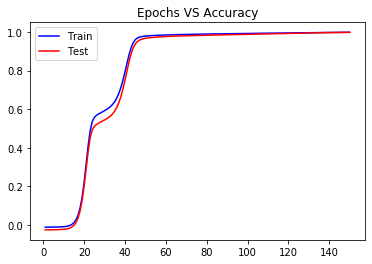

In [135]:
plt.plot(np.arange(0,iterations)+1,train_acc,'b')
plt.plot(np.arange(0,iterations)+1,val_acc,'r')
plt.title("Epochs VS Accuracy")
plt.legend(['Train','Test'])
# plt.ylim((0,3))
plt.show()

In [136]:
y_train_pred = nn_rel.predict(X_train)
y_test_pred = nn_rel.predict(X_test)

train_acc = nn_rel.check_accuracy(Y_train, y_train_pred)
test_acc = nn_rel.check_accuracy(Y_test, y_test_pred)

print("Train Accuracy = {0} & Test Accuracy = {1}".format(round(train_acc[0][0],3),round(test_acc[0][0],3)))

Train Accuracy = 0.999 & Test Accuracy = 0.998


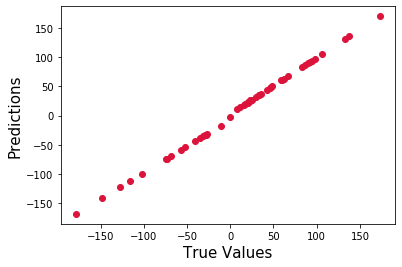

In [137]:
plt.scatter(Y_test, y_test_pred, c='crimson')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.show()

## TanH Activation

In [138]:
## hyperparameters
hidden_nodes = 4
output_nodes = 1

## define neural net
nn_tan = NN_Model()
nn_tan.add_layer(Linear_Layer(X_test.shape[1], hidden_nodes))
nn_tan.add_layer(TanH_Activation())
nn_tan.add_layer(Linear_Layer(hidden_nodes, output_nodes))

In [139]:
learning_rate = 0.005
iterations = 220
train_acc,train_loss_epoch,val_acc,val_loss_epoch = train(nn_tan,X_train , Y_train,epoch= iterations, learning_rate=learning_rate, X_val=X_test, y_val=Y_test)

10th Iteration: Training loss Loss = 818.666 | Testing Loss = 1144.833
20th Iteration: Training loss Loss = 641.676 | Testing Loss = 836.13
30th Iteration: Training loss Loss = 347.653 | Testing Loss = 467.293
40th Iteration: Training loss Loss = 155.088 | Testing Loss = 230.61
50th Iteration: Training loss Loss = 52.2 | Testing Loss = 96.385
60th Iteration: Training loss Loss = 8.525 | Testing Loss = 29.057
70th Iteration: Training loss Loss = 0.298 | Testing Loss = 3.228
80th Iteration: Training loss Loss = 10.342 | Testing Loss = 1.024
90th Iteration: Training loss Loss = 25.487 | Testing Loss = 8.988
100th Iteration: Training loss Loss = 34.295 | Testing Loss = 15.976
110th Iteration: Training loss Loss = 27.705 | Testing Loss = 13.525
120th Iteration: Training loss Loss = 19.543 | Testing Loss = 10.11
130th Iteration: Training loss Loss = 16.993 | Testing Loss = 8.99
140th Iteration: Training loss Loss = 14.344 | Testing Loss = 7.573
150th Iteration: Training loss Loss = 11.141 | 

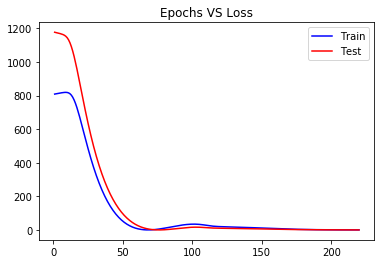

In [140]:
plt.plot(np.arange(0,iterations)+1,train_loss_epoch,'b')
plt.plot(np.arange(0,iterations)+1,val_loss_epoch,'r')
plt.title("Epochs VS Loss")
plt.legend(['Train','Test'])
# plt.ylim((0,3))
plt.show()

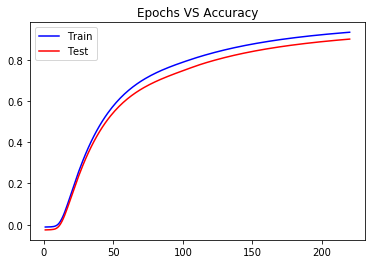

In [141]:
plt.plot(np.arange(0,iterations)+1,train_acc,'b')
plt.plot(np.arange(0,iterations)+1,val_acc,'r')
plt.title("Epochs VS Accuracy")
plt.legend(['Train','Test'])
# plt.ylim((0,3))
plt.show()

In [142]:
y_train_pred = nn_tan.predict(X_train)
y_test_pred = nn_tan.predict(X_test)

train_acc = nn_tan.check_accuracy(Y_train, y_train_pred)
test_acc = nn_tan.check_accuracy(Y_test, y_test_pred)

print("Train Accuracy = {0} & Test Accuracy = {1}".format(round(train_acc[0][0],3),round(test_acc[0][0],3)))

Train Accuracy = 0.933 & Test Accuracy = 0.9


In [143]:
y_test_pred.shape

(50, 1)

In [144]:
y_train_pred.shape

(100, 1)

In [145]:
plt.scatter(Y_test, y_test_pred, c='crimson')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.show()

### Summary:
### Yes when we change the activation function the update rule changes because the g'(z) changes. 
### for relu [self.output <=0] = 0 is set. 
### for tanh,self.g = 1 - (self.output)**2 , self.Inputg = next_g * self.g is set.
### Accuracy:
### Sigmoid - Train Accuracy = 0.961 & Test Accuracy = 0.909
### Tanh - Train Accuracy = 0.933 & Test Accuracy = 0.9
### Relu - Train Accuracy = 0.999 & Test Accuracy = 0.998
### Relu activation gave the best and consistent results on both train and test accuracy.